# Estimation, Prediction, Hypothesis Tests

## Estimation: summarizing posterior distributions

After performing Bayesian inference, we obtain a **posterior distribution** $p(\theta \mid d)$ for parameters $\theta$
given data $d$. To communicate results, we usually summarize this distribution with a few key numbers.

For a scalar parameter $\theta$:

- **Posterior mean**
  $$
  \mathbb{E}[\theta \mid d]
  = \int \theta \, p(\theta \mid d)\, d\theta.
  $$

- **Posterior variance**
  $$
  \operatorname{Var}(\theta \mid d)
  = \mathbb{E}[\theta^2 \mid d] - \big(\mathbb{E}[\theta \mid d]\big)^2
  = \int (\theta - \mu)^2 \, p(\theta \mid d)\, d\theta,
  \quad \mu = \mathbb{E}[\theta \mid d].
  $$

- **Posterior standard deviation**
  $$
  \operatorname{SD}(\theta \mid d)
  = \sqrt{\operatorname{Var}(\theta \mid d)}.
  $$

- **Posterior mode / MAP estimate**

  The **maximum a posteriori (MAP)** estimate is
  $$
  \hat{\theta}_{\text{MAP}}
  = \arg\max_{\theta} \, p(\theta \mid d)
  = \arg\max_{\theta} \, p(d \mid \theta)\, p(\theta),
  $$
  i.e. the value of $\theta$ where the posterior density is largest.


## MAP estimate for the beta–binomial model

In the beta–binomial model from earlier weeks,

- Prior: $\pi \sim \operatorname{Beta}(\alpha, \beta)$,
- Likelihood: $Y \mid \pi \sim \operatorname{Bin}(n, \pi)$,

the posterior is again beta:

$$
\pi \mid Y = k \sim \operatorname{Beta}(\alpha + k,\; \beta + n - k).
$$

For a beta distribution with shape parameters $\alpha' > 1$ and $\beta' > 1$, the **mode** is

$$
\operatorname{mode}\big(\operatorname{Beta}(\alpha', \beta')\big)
= \frac{\alpha' - 1}{\alpha' + \beta' - 2}.
$$

Thus, in the beta–binomial case, the **MAP estimate** of $\pi$ is

$$
\hat{\pi}_{\text{MAP}}
= \frac{\alpha + k - 1}{\alpha + \beta + n - 2},
\quad \text{for } \alpha + k > 1,\; \beta + n - k > 1.
$$

If the shape parameters are $\le 1$, the density is peaked at the boundaries, and the mode is at $0$ or $1$.

## Estimation from posterior samples

In realistic Bayesian models, the posterior $p(\theta \mid d)$ is usually not available in closed form.
Instead, we obtain **Monte Carlo samples** $\{\theta_i\}_{i=1}^N$ from $p(\theta \mid d)$ via MCMC.

Posterior summaries are then computed as **sample statistics**:

- Approximate posterior mean:
  $$
  \widehat{\mathbb{E}}[\theta \mid d]
  = \frac{1}{N} \sum_{i=1}^{N} \theta_i.
  $$

- Approximate posterior variance:
  $$
  \widehat{\operatorname{Var}}(\theta \mid d)
  = \frac{1}{N-1} \sum_{i=1}^{N} (\theta_i - \bar{\theta})^2,
  \quad \bar{\theta} = \frac{1}{N}\sum_{i=1}^{N} \theta_i.
  $$

- Approximate posterior standard deviation:
  $$
  \widehat{\operatorname{SD}}(\theta \mid d)
  = \sqrt{\widehat{\operatorname{Var}}(\theta \mid d)}.
  $$

Computing the **mode** from samples is less direct: one must estimate the density (e.g. via kernel density estimation)
and find its maximum numerically.

## Credible intervals

A **credible interval** for a parameter $\theta$ is an interval $[a,b]$ such that the posterior probability that
$\theta$ lies in the interval equals some chosen level $p$ (e.g. $0.8$, $0.89$, $0.95$):

$$
P(\theta \in [a,b] \mid d)
= \int_{a}^{b} p(\theta \mid d)\, d\theta
= p.
$$

For example, an **80% credible interval** $[a,b]$ satisfies

$$
P(\theta \in [a,b] \mid d) = 0.8.
$$

Two common types of credible intervals:

1. **Central (middle) credible interval** of level $p$:
   $$
   \theta \in \big[ q_{(1-p)/2}, \; q_{(1+p)/2} \big],
   $$
   where $q_r$ is the $r$-quantile of the posterior.

2. **Highest Density Interval (HDI)** of level $p$:
   an interval $[a,b]$ with
   - posterior probability mass $p$,
   - and **maximum posterior density** inside the interval compared to outside.

Credible intervals are also sometimes called **compatibility intervals** because they describe the range of parameter
values most compatible with the observed data and the model.

## Highest Density Interval (HDI)

The **Highest Density Interval (HDI)** of level $p$ is the smallest interval $[a,b]$ such that

- it contains probability mass $p$:
  $$
  \int_{a}^{b} p(\theta \mid d)\, d\theta = p,
  $$
- every point inside the interval has **higher posterior density** than any point outside:
  $$
  p(\theta \mid d) \ge p(\theta' \mid d)
  \quad \text{for all } \theta \in [a,b],\; \theta' \notin [a,b].
  $$

Intuition:

- If the posterior is **symmetric and unimodal** (e.g. nearly normal), the HDI and central interval are very similar.
- If the posterior is **skewed** or **multimodal**, the HDI focuses on the region(s) of **highest posterior density**.

A conceptual algorithm for computing an HDI from a univariate posterior:

1. Choose a probability level $p$ (e.g. $0.8$ or $0.94$).
2. Consider all intervals that contain probability mass $p$.
3. Among these, select the interval with the **smallest width** $b-a$.

In practice, for posterior samples, libraries such as ArviZ (`az.hdi`) approximate the HDI directly.

Note: PyMC / ArviZ often use an HDI probability of **94%** by default. This is a reminder that, unlike the
conventional 95% frequentist confidence interval, the exact choice of probability (e.g. 89%, 94%, 95%) is somewhat
arbitrary and should be chosen to communicate uncertainty effectively.

## Credible intervals vs confidence intervals

**Bayesian credible interval (CI)** for $\theta$ (level $p$):

- Definition:
  $$
  P(\theta \in [a,b] \mid d) = p.
  $$
- Interpretation:
  > Given the data and the model, the probability that $\theta$ lies in $[a,b]$ is $p$.
- Probability statements are about the **parameter** $\theta$ (which is uncertain).

**Frequentist confidence interval (CI)** for $\theta$ (level $p$):

- Definition (informally): If we repeatedly collect data sets under identical conditions and construct an interval
  $[a^{(j)},b^{(j)}]$ from each sample using a specified procedure, then **in the long run** a fraction $p$ of these
  intervals will contain the true parameter $\theta_{\text{true}}$.

- Interpretation:
  > The procedure has coverage probability $p$; in repeated sampling, $p$-fraction of the intervals contain $\theta_{\text{true}}$.

- Incorrect but common statement (to avoid):
  > “Our particular confidence interval contains the true value with probability $p$.”  
  In the frequentist framework, $\theta_{\text{true}}$ is not random, so this is not strictly correct.

Key differences:

- Bayesian CIs express a **degree of belief** about the parameter in light of data and priors.
- Frequentist CIs are statements about the **procedure** and long-run frequency properties, not about a single
  realized interval.

## Posterior predictive distribution

Given data $y$ and parameters $\theta$, the **likelihood** $p(y_{\text{new}} \mid \theta)$ describes the distribution
of future or hypothetical observations $y_{\text{new}}$ given a fixed value of $\theta$.

In Bayesian inference, we do not know $\theta$ exactly, but we have a posterior $p(\theta \mid y)$.
The predictive distribution for future data $y_{\text{new}}$ given observed data $y$ is obtained by **marginalising out**
$\theta$:

$$
p(y_{\text{new}} \mid y)
= \int p(y_{\text{new}} \mid \theta)\, p(\theta \mid y)\, d\theta.
$$

This distribution is called the **posterior predictive distribution**.

Interpretation:

- $p(y_{\text{new}} \mid y)$ is a **model-based forecast** that averages the likelihood over all plausible values of
  $\theta$, weighted by their posterior probability.
- It naturally accounts for **parameter uncertainty** as well as **sampling variability**.

## Posterior predictive simulation from samples

In practice, we usually have posterior samples $\{\theta_i\}_{i=1}^{N}$ from $p(\theta \mid y)$.

We can approximate $p(y_{\text{new}} \mid y)$ by simulation:

1. Draw $\theta_i \sim p(\theta \mid y)$ (these are the MCMC samples).
2. For each $\theta_i$, draw
   $$
   y_{\text{new}, i} \sim p(y_{\text{new}} \mid \theta_i)
   $$
   from the likelihood (for example, binomial, normal, Poisson, etc.).
3. The collection $\{y_{\text{new}, i}\}_{i=1}^{N}$ is a sample from the **posterior predictive distribution**.

Posterior predictive summaries:

- Predictive mean:
  $$
  \widehat{\mathbb{E}}[y_{\text{new}} \mid y]
  = \frac{1}{N} \sum_{i=1}^N y_{\text{new}, i}.
  $$
- Predictive variance and standard deviation: sample variance and SD of the $y_{\text{new},i}$.
- Predictive credible intervals: quantiles or HDIs of the $y_{\text{new},i}$.

This method avoids explicit evaluation of the integral
$$
\int p(y_{\text{new}} \mid \theta)\, p(\theta \mid y)\, d\theta
$$
and works for essentially arbitrary models.

## Decomposing predictive uncertainty: aleatoric vs epistemic

The predictive distribution $p(y_{\text{new}} \mid y)$ mixes two kinds of uncertainty:

- **Aleatoric uncertainty** (sampling variability, inherent noise): variability in $y_{\text{new}}$ even if $\theta$
  were known exactly.
- **Epistemic uncertainty** (model/parameter uncertainty): additional variability due to our imperfect knowledge of
  $\theta$, represented by the posterior $p(\theta \mid y)$.

The decomposition is captured by the **law of total variance**. Let $Y_{\text{new}}$ denote a future observation and
$\Theta$ the parameter. Then

$$
\operatorname{Var}(Y_{\text{new}} \mid y)
= \mathbb{E}_{\Theta \mid y}
    \big[\, \operatorname{Var}(Y_{\text{new}} \mid \Theta, y) \,\big]
  \;+\;
  \operatorname{Var}_{\Theta \mid y}
    \big[\, \mathbb{E}(Y_{\text{new}} \mid \Theta, y) \,\big].
$$

Interpretation:

- The first term
  $$
  \mathbb{E}_{\Theta \mid y}
    \big[\, \operatorname{Var}(Y_{\text{new}} \mid \Theta, y) \,\big]
  $$
  is the **aleatoric variance**: average inherent noise in $Y_{\text{new}}$ for a given $\Theta$, averaged over the
  posterior of $\Theta$.

- The second term
  $$
  \operatorname{Var}_{\Theta \mid y}
    \big[\, \mathbb{E}(Y_{\text{new}} \mid \Theta, y) \,\big]
  $$
  is the **epistemic variance**: variability in the predictive mean due to uncertainty in $\Theta$.

As we collect more data:

- the **epistemic component** typically decreases (posterior concentrates),
- the **aleatoric component** remains (it is intrinsic to the data-generating process).

## Frequentist hypothesis testing for a proportion

Consider testing a statement about a population proportion $\pi$ based on binomial data $Y \sim \operatorname{Bin}(n,\pi)$.

Example one-sided test:

- Null hypothesis:
  $$
  H_0: \pi \le \pi_0
  $$
- Alternative hypothesis:
  $$
  H_1: \pi > \pi_0.
  $$

A typical frequentist workflow:

1. **Estimator**  
   Use the sample proportion
   $$
   \hat{\pi} = \frac{Y}{n}.
   $$

2. **Test statistic (approximate $z$ test)**  
   Under $H_0$ (with large $n$), the standardized test statistic
   $$
   Z
   = \frac{\hat{\pi} - \pi_0}
          {\sqrt{\pi_0 (1 - \pi_0) / n}}
   $$
   is approximately standard normal: $Z \approx \mathcal{N}(0,1)$.

3. **p-value**  
   For the one-sided test, the p-value is
   $$
   p\text{-value}
   = P(Z \ge z_{\text{obs}} \mid H_0),
   $$
   where $z_{\text{obs}}$ is the observed test statistic.

4. **Decision**  
   Choose a significance level $\alpha$ (e.g. $\alpha = 0.05$). If the p-value $\le \alpha$, reject $H_0$; otherwise,
   do not reject $H_0$.

Note that in the frequentist framework we never assign a **probability** to $H_0$ or $H_1$ themselves; we only evaluate
the probability of **data or statistics** under $H_0$.

## Bayesian hypothesis testing, posterior odds, and Bayes factors

In the Bayesian framework, hypotheses are treated like any other propositions to which we can assign **prior and
posterior probabilities**.

Consider two competing hypotheses $H_0$ and $H_1$ (e.g., statements about a parameter range).

- **Prior probabilities**: $P(H_0)$ and $P(H_1)$
- **Prior odds**:
  $$
  \frac{P(H_1)}{P(H_0)}.
  $$

Given data $d$, we can compute **posterior probabilities** $P(H_0 \mid d)$ and $P(H_1 \mid d)$ and the **posterior odds**:

$$
\frac{P(H_1 \mid d)}{P(H_0 \mid d)}.
$$

The **Bayes factor** in favour of $H_1$ against $H_0$ is defined as

$$
\operatorname{BF}_{10}
= \frac{p(d \mid H_1)}{p(d \mid H_0)},
$$

where $p(d \mid H)$ is the **marginal likelihood** of $d$ under hypothesis $H$.

Bayes factor and odds are related via

$$
\frac{P(H_1 \mid d)}{P(H_0 \mid d)}
= \operatorname{BF}_{10} \cdot \frac{P(H_1)}{P(H_0)}.
$$

Interpretation:

- $\operatorname{BF}_{10} > 1$: data provide evidence in favour of $H_1$ over $H_0$.
- $\operatorname{BF}_{10} < 1$: data favour $H_0$.
- The Bayes factor measures how much the data **change our odds** between hypotheses.

## Interpreting Bayes factors

A rough guideline for interpreting the magnitude of $\operatorname{BF}_{10}$:

- $1$–$3$: not worth more than a bare mention
- $3$–$10$: substantial evidence for $H_1$
- $10$–$100$: strong evidence for $H_1$
- $> 100$: decisive evidence for $H_1$

Similarly, very small values (e.g. $\operatorname{BF}_{10} < 1/10$) provide strong evidence in favour of $H_0$.

These rules of thumb should **not** be used as rigid thresholds (like $\alpha = 0.05$ for p-values), but rather as
a way to interpret the **strength of evidence** provided by the data.

## Two-sided Bayesian tests and ROPEs

For continuous parameters, testing an exact point hypothesis such as $H_0: \theta = \theta_0$ is problematic because,
under a continuous posterior, $P(\theta = \theta_0 \mid d) = 0$.

A practical workaround is the concept of a **Region of Practical Equivalence (ROPE)**.

Example:

- Suppose we are interested in whether a proportion $\pi$ is effectively equal to some value $\pi_0$ (e.g. $0.93$).
- Choose a small tolerance $\delta > 0$ representing a region of values that are **practically indistinguishable** from
  $\pi_0$.

Define the hypotheses:

- Null hypothesis (practical equivalence):
  $$
  H_0: \pi \in [\pi_0 - \delta,\; \pi_0 + \delta]
  $$
- Alternative hypothesis:
  $$
  H_1: \pi \notin [\pi_0 - \delta,\; \pi_0 + \delta].
  $$

We can then compute:

- $P(H_0 \mid d) = P(\pi \in \text{ROPE} \mid d)$,
- $P(H_1 \mid d) = P(\pi \notin \text{ROPE} \mid d)$,
- and posterior odds
  $$
  \frac{P(H_1 \mid d)}{P(H_0 \mid d)}.
  $$

If the posterior puts most of its mass inside the ROPE, the data support **practical equivalence**. If most mass lies
outside, the data support a **meaningful difference**.

## Frequentist vs Bayesian hypothesis tests

Key conceptual differences:

- **Frequentist tests**:
  - Specify a null hypothesis $H_0$ and often an alternative $H_1$.
  - Compute a test statistic and a p-value $P(\text{data or more extreme} \mid H_0)$.
  - May **reject $H_0$** if the p-value is below a chosen threshold $\alpha$.
  - Do **not** provide probabilities for hypotheses themselves.

- **Bayesian tests**:
  - Assign **prior probabilities** to hypotheses (or models).
  - Compute **posterior probabilities** $P(H \mid d)$ and **posterior odds**.
  - Use **Bayes factors** to quantify how strongly data support one hypothesis over another.
  - Allow direct statements such as “Given the data and prior, we believe with $p\%$ that $H_1$ is true”.

The two approaches can yield different practical conclusions, especially when:

- There is strong **prior belief** in a particular hypothesis, and
- The observed data under that hypothesis are **unlikely** but not impossible.

Bayesian methods make it explicit that **one surprising data set** should not necessarily overturn a well-established
theory if the prior evidence for that theory is overwhelming.

# Exercises

Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import preliz as pz
from tqdm.auto import tqdm
import pymc as pm
plt.rcParams["figure.figsize"] = (15,3)
plt.style.use('ggplot')
np.random.seed(1337) # for consistency

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Exercise 1

The maternity ward of a small regional hospital wants to use Bayesian statistics to better
plan the expected daily number of beds needed. In particular, they want to assess whether
a total number of 20 beds will, with only a few exceptions, be enough.

They have collected data for 30 nights (number of occupied beds per night):

$$
y = \{6, 11, 12, 9, 11, 10, 9, 18, 9, 18, 12, 14, 9, 11, 10,
15, 13, 11, 14, 12, 11, 8, 11, 13, 11, 12, 20, 5, 13, 16\}.
$$

You will build a Poisson--Gamma model for these data, fit it using PyMC, and use the model
to answer planning questions for the maternity ward.

Data:

In [2]:
beds = np.array([ 6, 11, 12,  9, 11, 10,  9, 18,  9, 18, 12, 14,  9, 11, 10, 15, 13, 11, 14, 12, 11,  8, 11, 13, 11, 12, 20,  5, 13, 16])

### a)

Assume a Poisson likelihood for the number of occupied beds per night,

$$
y \sim \operatorname{Pois}(\lambda).
$$

Quickly check whether this modelling choice is **not totally unreasonable** by verifying, as
far as the data allow, that the assumptions of the Poisson distribution are (more or less)
fulfilled.

In particular, compare the **sample mean** and **sample variance** of $y$.

In [3]:
np.mean( beds )

11.8

In [4]:
np.var( beds )

10.76

Variance and mean are (more or less) similar, let's proceed with a Poisson distribution.

### b)

Next, elicit a prior distribution for $\lambda$. For convenience, use a **Gamma distribution**.

The nurses tell you that

- on average, about **15 beds** are occupied per night,
- on some nights, it can be as low as **10 beds**,
- the number **20 beds** is only **very rarely exceeded**.

Choose parameters for a gamma prior $\lambda \sim \operatorname{Gamma}(s, r)$ that reflect
this prior knowledge and visualize the prior.

$E[\lambda] = \frac{s}{r} = 15 \Rightarrow s = 15r$

Experiment until approximately variance from exercise description is reached:

<Axes: >

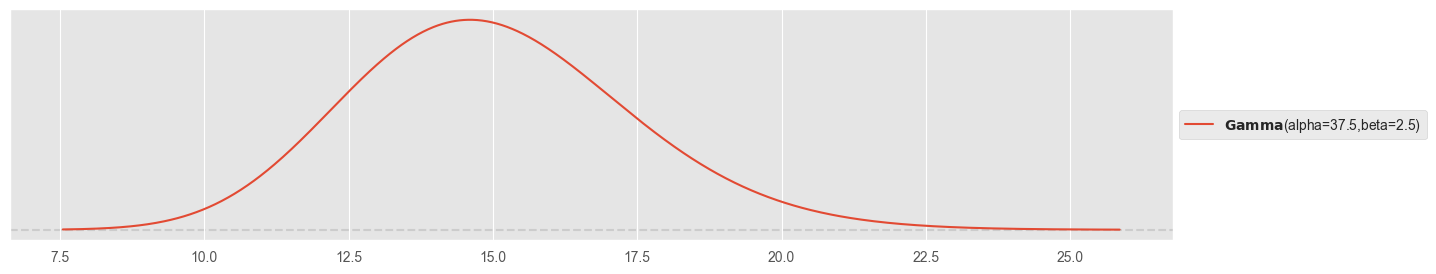

In [5]:
r = 2.5
s = 15 * r
pz.Gamma(s, r).plot_pdf()

In [6]:
r, s

(2.5, 37.5)

### c)

You are a bit unsure whether you have used the correct parameterization for the gamma
distribution (confusion between $s,r$ and $\alpha,\beta$). To check, you first sample from
the prior only and look at the resulting distribution of samples.

Using PyMC, define only the prior

```python
lbd = pm.Gamma("lbd", alpha=s, beta=r)
```

and call `pm.sample()` **without** any likelihood term to draw samples from the prior.
Produce a density plot (e.g. with `pm.plot_posterior()` or `pm.plot_trace()`) and verify
that it matches the prior you elicited in part (b).

Sample only from prior:

In [7]:
with pm.Model() as maternity_ward_model:
    lbd = pm.Gamma( 'lbd', alpha=s, beta=r )
    trace = pm.sample( 1000 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lbd]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


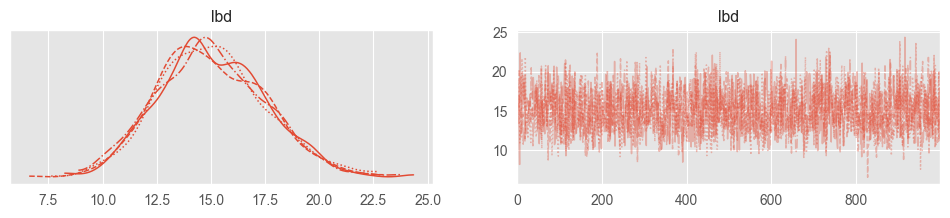

In [8]:
pm.plot_trace( trace );

Looks as defined!

### d)

Now include the Poisson likelihood in your PyMC model and perform an **MCMC simulation**
to obtain $4000$ samples from the **posterior** of $\lambda$.

Use the usual diagnostic tools to verify that the simulation looks nominal:

- trace (or rank) plots,
- posterior density plot,
- autocorrelation,
- $\hat R$,
- effective sample size (ESS).

Full model:

In [9]:
with pm.Model() as maternity_ward_model:
    lbd = pm.Gamma( 'lbd', alpha=s, beta=r )
    y = pm.Poisson( 'y', mu=lbd, observed=beds )
    trace = pm.sample( 1000 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lbd]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


Trace and density plot:

array([[<Axes: title={'center': 'lbd'}>,
        <Axes: title={'center': 'lbd'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

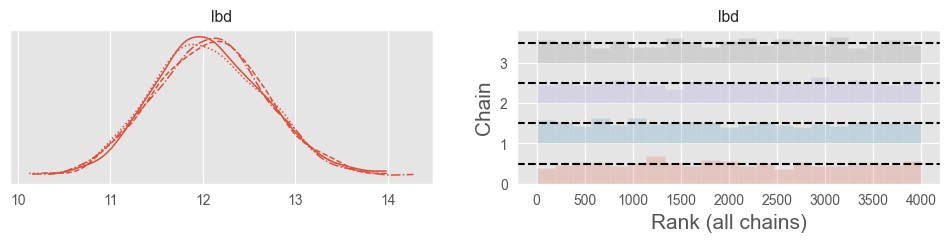

In [10]:
pm.plot_trace( trace, kind="rank_bars" )

Autocorrelation plot:

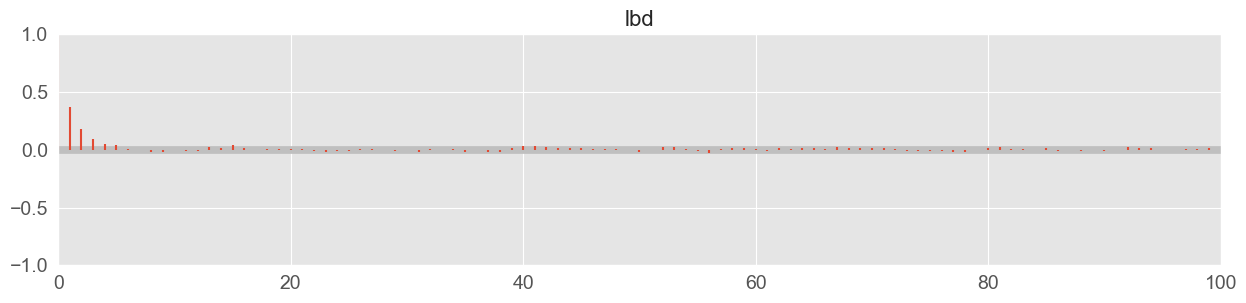

In [11]:
pm.plot_autocorr( trace, combined=True );

In [12]:
pm.rhat( trace )

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    lbd      float64 8B 1.002

In [13]:
pm.ess( trace )

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    lbd      float64 8B 1.624e+03

Looks nominal!

### e)

Plot the posterior density of $\lambda$ with `pm.plot_posterior()` and make sure that the
plot shows a **95% highest density interval (HDI)**.

- What are the **posterior mean** and **posterior standard deviation** of $\lambda$?
- Formulate how you would communicate your result to the **supervisor of the maternity
  ward** in words (no formulas).

<Axes: title={'center': 'lbd'}>

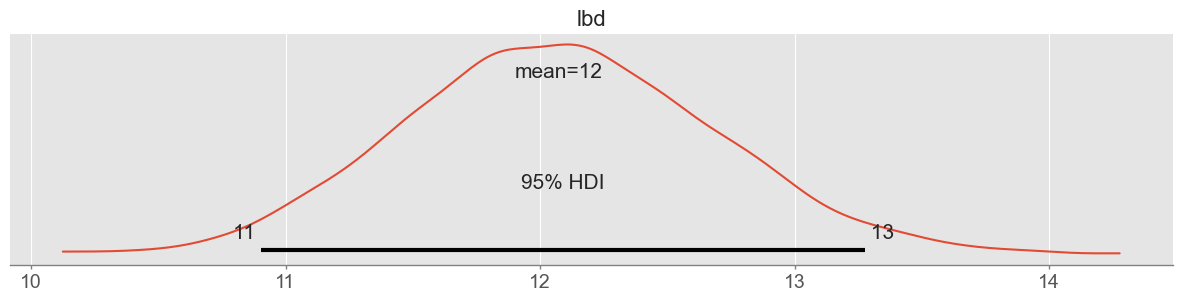

In [14]:
pm.plot_posterior( trace, hdi_prob=0.95 )

In [15]:
pm.summary( trace, hdi_prob=0.95 )

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lbd,12.072,0.611,10.904,13.275,0.015,0.011,1624.0,2515.0,1.0


"After considering the 30 measurements, I believe to 95% that the **mean** number of beds used per night is somewhere between 10.9 and 13.2, if I had to guess a number, I would say 12. The standard deviation is quite small with $\pm$0.6 beds. However the mean only reflects my model knowledge, but not my predictions!"

### f)

The supervisor wants to know your **prediction** for the expected number of days per year
when the total number of 20 beds will be **exceeded**.

What do you tell them?

*Hint.* First compute the **posterior predictive distribution** for the number of occupied
beds per night, as in the lecture, using `pm.sample_posterior_predictive()`.

In [16]:
with maternity_ward_model:
    y_new = pm.Poisson('y_new', mu=lbd)
    predictions = pm.sample_posterior_predictive(trace, var_names=["y_new"])

Sampling: [y_new]


In [17]:
365 * np.mean( predictions.posterior_predictive.y_new > 20 ).values

4.015

Around 4-5 days per year!

### g)

Will your model get much better if you collect **more data**?

Compute the **proportions of aleatoric and epistemic uncertainty** relative to the total
predictive uncertainty for the number of occupied beds per night.

*Hint.* Use the formulas from the lecture and the fact that, for a Poisson distribution,

$$
\mathbb{E}[y \mid \lambda] = \operatorname{Var}(y \mid \lambda) = \lambda.
$$

In [18]:
aleatoric_var = np.mean( trace.posterior.lbd.values )
epistemic_var = np.var( trace.posterior.lbd.values )
pred_var = np.var( predictions.posterior_predictive.y_new.values )
np.round( np.array( [aleatoric_var, epistemic_var] ) / (aleatoric_var+epistemic_var) * 100, 1 )

array([97.,  3.])

Aleatoric variance makes up 97%. More data will not yield much improvement here!

## Exercise 2

A large tech company wants to reduce the amount of toilet paper used in their facilities,
both to save money and to advertise their sustainability efforts. They replace the original
toilet paper rolls with thinner paper. Management is worried that people might simply use
**more** toilet paper to compensate.

Before the replacement, the total weekly use (in kilograms) is measured for 5 weeks
(labelled **before**, or **b**):

$$
y_b = \{181, 152, 148, 146, 171\}.
$$

After replacing the rolls with thinner paper, the total weekly use is measured for another
5 weeks (labelled **after**, or **a**):

$$
y_a = \{163, 153, 146, 126, 142\}.
$$

You will analyse these data with a normal model and empirical Bayes priors.

In [19]:
y_b_obs = np.array([181, 152, 148, 146, 171])
y_a_obs = np.array([163, 153, 146, 126, 142])

### a)

Assume the same **normally distributed model** as in the railway counter queue example
from the lecture and simulate from the posterior to obtain a posterior understanding of

$$
\mu_a, \; \mu_b, \; \sigma_a, \; \sigma_b.
$$

Instead of eliciting a prior by hand, use an **empirical Bayes** approach and set

$$
\mu_a \sim \mathcal{N}(\bar{y}_a,\; \hat{\sigma}_a), \qquad
\mu_b \sim \mathcal{N}(\bar{y}_b,\; \hat{\sigma}_b),
$$

$$
\sigma_a \sim \operatorname{Exp}\!\big(1/\hat{\sigma}_a\big), \qquad
\sigma_b \sim \operatorname{Exp}\!\big(1/\hat{\sigma}_b\big),
$$

where $\bar{y}$ denotes the sample mean and $\hat{\sigma}^2$ the sample variance (use
`ddof=1` in NumPy to compute it).

Explain why choosing the **standard deviations** of the priors on $\mu_a$ and $\mu_b$ to be
as large as the sample standard deviations of the data makes these priors **very weak**.

In [20]:
with pm.Model() as toilet_paper_model:
    μ_b = pm.Normal( 'μ_b', mu=np.mean(y_b_obs), sigma=np.std(y_b_obs, ddof=1) )
    μ_a = pm.Normal( 'μ_a', mu=np.mean(y_a_obs), sigma=np.std(y_a_obs, ddof=1) )
    σ_b = pm.Exponential( 'σ_b', lam=1/np.std(y_b_obs, ddof=1) )
    σ_a = pm.Exponential( 'σ_a', lam=1/np.std(y_a_obs, ddof=1) )
    y_b = pm.Normal( 'y_b', mu=μ_b, sigma=σ_b, observed=y_b_obs )
    y_a = pm.Normal( 'y_a', mu=μ_a, sigma=σ_a, observed=y_a_obs )
    trace = pm.sample( 1000 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ_b, μ_a, σ_b, σ_a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Check chain quickly:

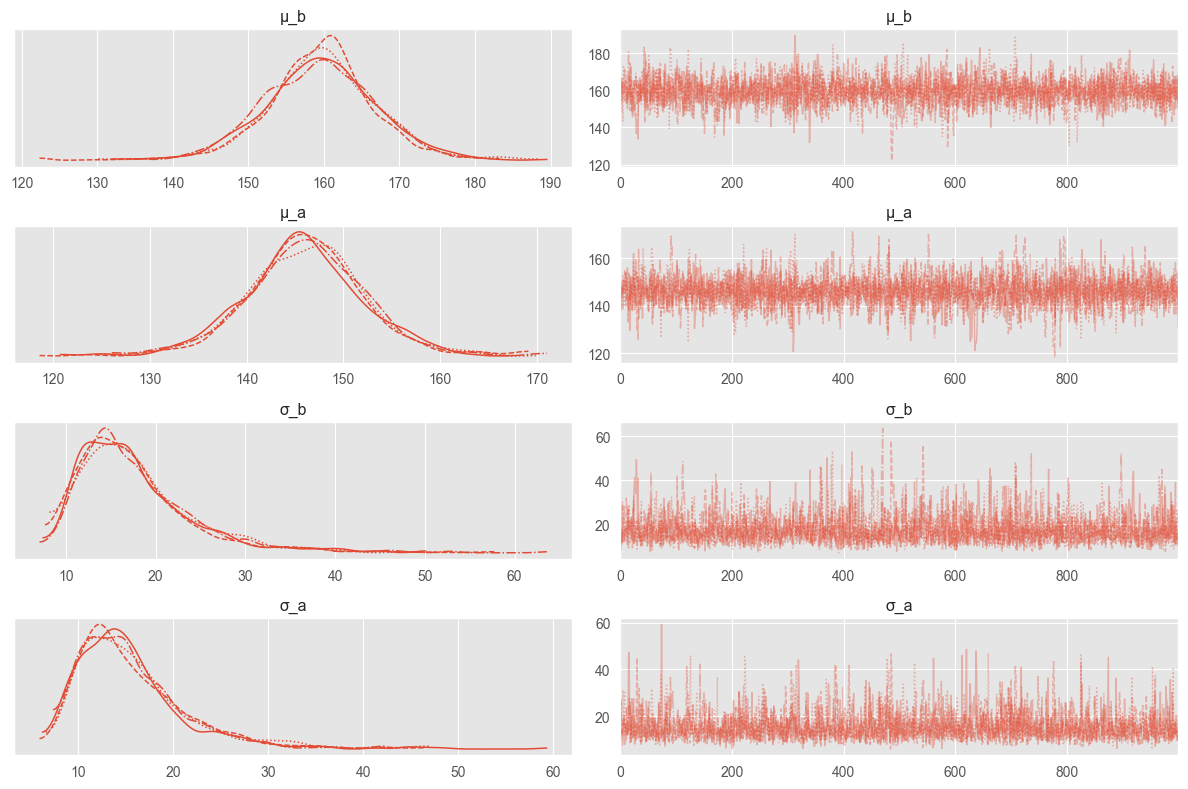

In [21]:
pm.plot_trace( trace )
plt.tight_layout()

Looks good!

### b)

Consider the **relative saved amount of toilet paper** (in kilograms)

$$
\frac{\mu_b - \mu_a}{\mu_b}.
$$

Compute an **80% HDI** for this quantity from your posterior samples.

- What range of relative savings appears plausible?
- Based on this, would you recommend continuing to use the new, thinner toilet paper?

<Axes: title={'center': 'x'}>

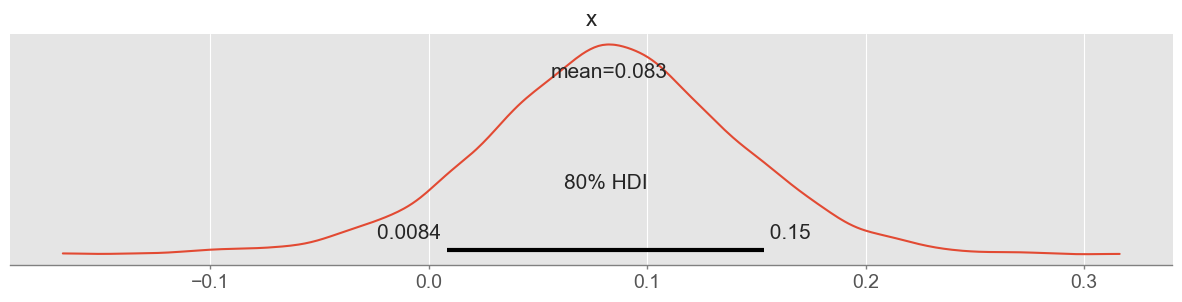

In [22]:
reldiff = (trace.posterior.μ_b - trace.posterior.μ_a) / trace.posterior.μ_b
pm.plot_posterior( reldiff, hdi_prob=0.8 )

In [23]:
pm.hdi( reldiff, hdi_prob=0.8 ).x.values

array([0.00840125, 0.15365165])

With a plausibility of 80%, about 1-15% toilet paper mass less is used! This does not appear very certain and more data will be needed for a better number. However it is already now quite clear that likely the weekly mass of toilet paper used was reduced.

### c)

The facility head promised *before* the experiment:

> "I am very sure that we will cut down the amount of toilet paper (in kg) **at least by
> $20\%$**!"

Formulate this as a Bayesian **hypothesis test** and compute the **odds** that his statement
is true.

- Did he exaggerate, given the observed data?

* $H_1$: $(\mu_b - \mu_a)/\mu_b \geq 20$%
* $H_2$: $(\mu_b - \mu_a)/\mu_b < 20$%

In [24]:
PH1d = np.mean( reldiff.values >= 0.2 )
PH1d

0.022

In [25]:
PH2d = 1-PH1d
PH2d

0.978

In [26]:
posterior_odds = PH1d / PH2d
posterior_odds

0.022494887525562373

Given the measured data, the odds for his hypothesis are very small!

### d)

After you have destroyed his illusions, he says:

> "Ok, but the data show that it is **at least $10\%$**!"

Quantify the **plausibility** of this new statement using the posterior distribution of

$$
\frac{\mu_b - \mu_a}{\mu_b}.
$$

Compare your result to part (c) and discuss whether the new claim is supported by the data.

In [27]:
np.mean( reldiff.values >= 0.1 )

0.37875

This hypothesis is true with a probability of 38% (number might change slightly in multiple runs)! The value might as well be smaller!

## Exercise 3

A company produces a novel type of medical implant screws. The production machines have
recently been set up and are at a steady production rate of **1000 screws per day**. Very
rarely, the machines produce a **defective** screw that does not meet the rigorous standards
for medical devices and must be discarded.

So far, after **30 days** of production, this has occurred **5 times**.

You want to estimate the underlying defect rate and assess the predictive uncertainty for
future production.

### a)

You are tasked with estimating the **defect rate** of the new machines.

Instead of using a beta prior as in earlier binomial problems, choose a prior that follows an
**exponential distribution** for the defect rate $\pi$. Your prior should reflect the empirically
observed rate of

$$
\frac{5}{30\,000}
$$

as a **mean rate** (empirical Bayes). Visualize this prior distribution.

Prior:

<Axes: >

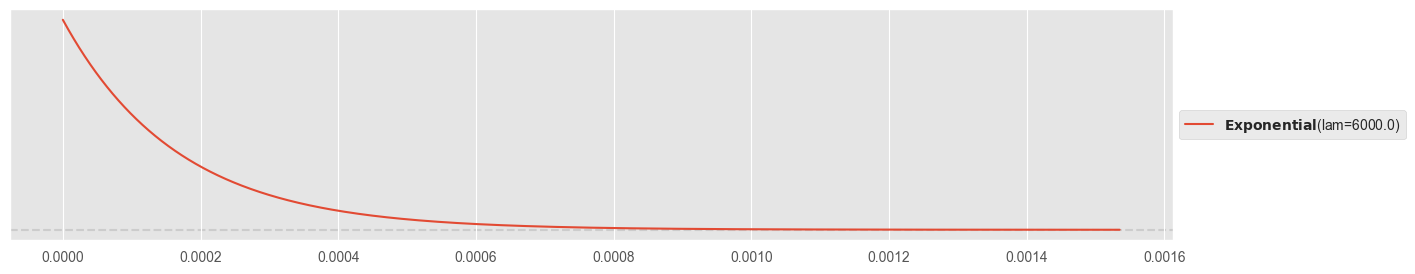

In [28]:
mean_rate = 5/30000
pz.Exponential(lam=1/mean_rate).plot_pdf()

### b)

Given this prior and the data from the first 30 days, estimate and visualize a **posterior
distribution** for the defect rate $\pi$ of the screws.

What is the **90% HDI** of your estimate of $\pi$?

Run simulation:

In [29]:
with pm.Model() as defective_screw_model:
    pi = pm.Exponential( 'pi', lam=1/mean_rate)
    y = pm.Binomial( 'y', n=30000, p=pi, observed=5 )
    trace = pm.sample( 1000 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


Diagnostics:

array([[<Axes: title={'center': 'pi'}>, <Axes: title={'center': 'pi'}>]],
      dtype=object)

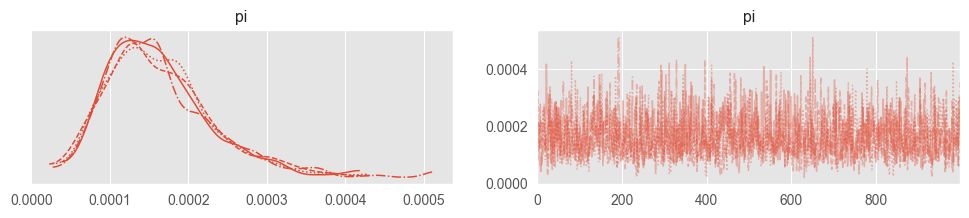

In [30]:
pm.plot_trace( trace )

<Axes: title={'center': 'pi'}>

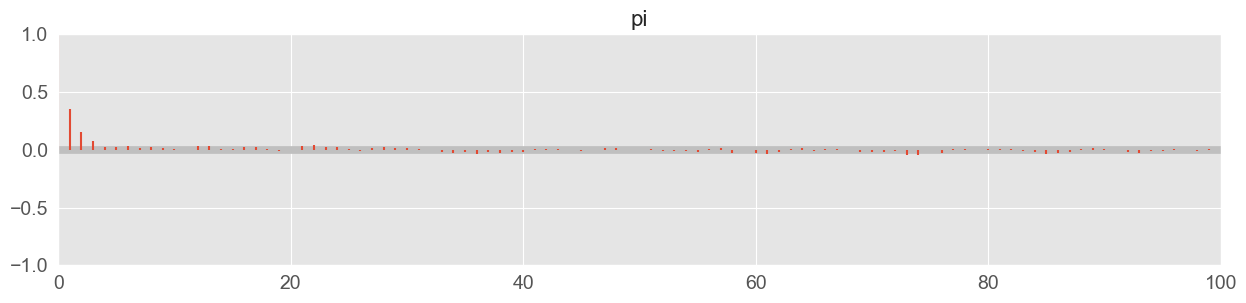

In [31]:
pm.plot_autocorr( trace, combined=True )

Looks good!

Visualize posterior:

<Axes: title={'center': 'pi'}>

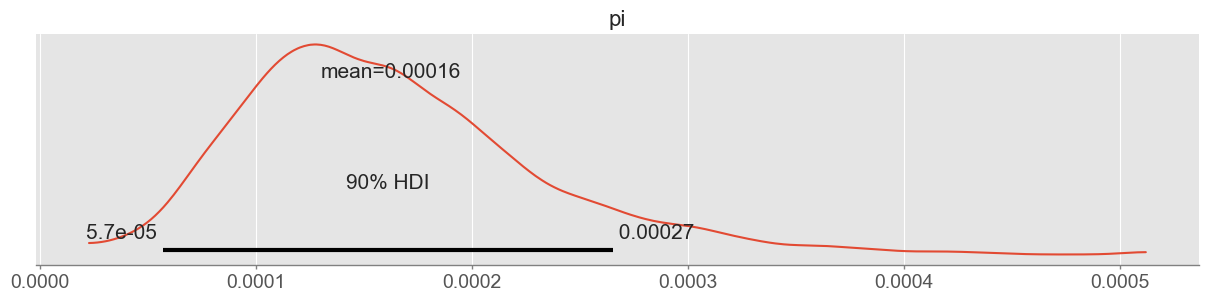

In [32]:
pm.plot_posterior( trace, hdi_prob=0.9 )

In [33]:
pm.hdi( trace, hdi_prob=0.9 ).pi.values

array([5.69145713e-05, 2.65217122e-04])

90% HDI is between 6 in 100'000 and 2.7 in 1000. There is still quite some uncertainty!

### c)

What number of **defective screws** can you expect for the next **30 days** of production?
For planning purposes, sales require a **90% HDI** for this number.

Compute the proportions of **aleatoric** and **epistemic** uncertainty in the **total predictive
uncertainty** for the number of defective screws in the next 30 days.

Can you promise the sales department that your predictions will become **much more precise**
next time when you have more data?

In [34]:
with defective_screw_model:
    y_new = pm.Binomial('y_new', n=30000, p=pi)
    predictions = pm.sample_posterior_predictive(trace, var_names=["y_new"])

Sampling: [y_new]


<Axes: title={'center': 'y_new'}>

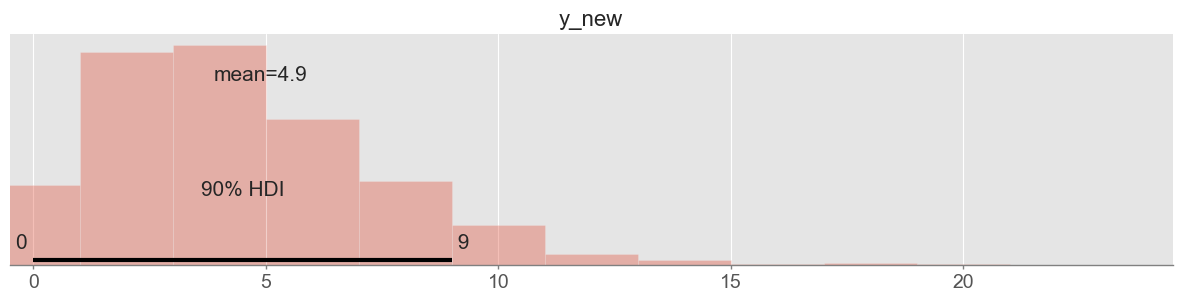

In [35]:
pm.plot_posterior( predictions.posterior_predictive.y_new, hdi_prob=0.9 )

In [36]:
pm.hdi( predictions.posterior_predictive.y_new, hdi_prob=0.9 ).y_new.values

array([0., 9.])

Within the next 30 days, I believe to 90% that between 0-9 screws will be defective.

Aleatoric and epistemic uncertainty:

In [37]:
n_new = 30000
aleatoric_vars = n_new * trace.posterior.pi.values * (1-trace.posterior.pi.values)
aleatoric_var = np.mean( aleatoric_vars )
aleatoric_var

4.873439716385704

In [38]:
epistemic_var = np.var( trace.posterior.pi.values * n_new )
epistemic_var

4.164256920065471

Looks like there is the same amount of epistemic variance and aleatoric variance - more data should improve the predictions.

Check: Real predictive uncertainty vs theoretical one:

In [39]:
predictive_var = np.var( predictions.posterior_predictive.y_new.values )
predictive_var, aleatoric_var+epistemic_var

(9.016679, 9.037696636451175)

### d)

After the next 30 days, you receive an update from the engineering team: after a total of
**60 days** (the previous period plus this one), **60\,000** screws have been produced and
**8** have been found to be defective.

Update your estimate from part (c) using the **combined data** and recompute the proportions
of aleatoric and epistemic uncertainty in the total predictive uncertainty.

You may keep your previous prior and add the full data set
$(n = 60\,000, k = 12)$ as suggested in the exercise sheet.

Re-run simulation with more data:

In [40]:
with pm.Model() as defective_screw_model2:
    pi = pm.Exponential( 'pi', lam=1/mean_rate)
    y = pm.Binomial( 'y', n=60000, p=pi, observed=8 )
    trace2 = pm.sample( 1000 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


Visualize posterior belief for proportion $\pi$:

<Axes: title={'center': 'pi'}>

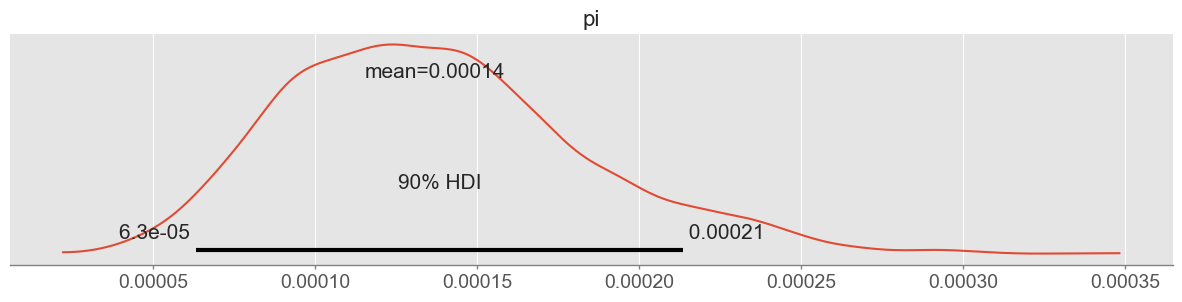

In [41]:
pm.plot_posterior( trace2, hdi_prob=0.9 )

In [42]:
pm.hdi( trace2, hdi_prob=0.9 ).pi.values

array([6.32064548e-05, 2.13477619e-04])

90% HDI changed to between 7 in 10000 and 2 in 1000. In particular the upper bound is considerably lower.

Prediction for the next 30 days:

In [43]:
with defective_screw_model2:
    y_new = pm.Binomial('y_new', n=30000, p=pi)
    predictions2 = pm.sample_posterior_predictive(trace2, var_names=["y_new"])

Sampling: [y_new]


<Axes: title={'center': 'y_new'}>

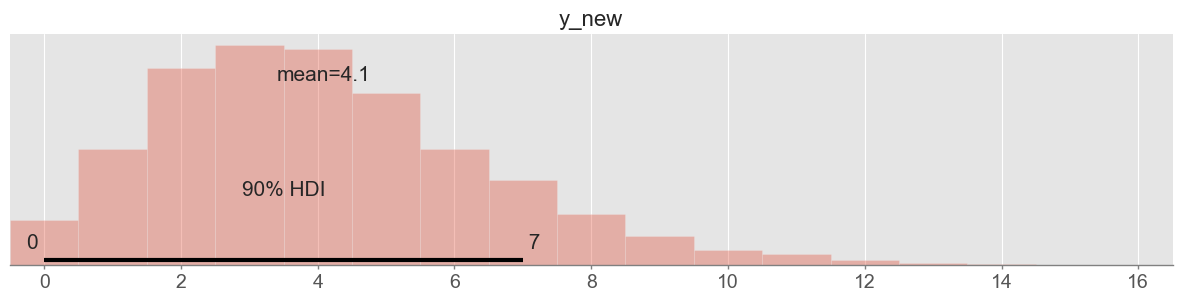

In [44]:
pm.plot_posterior( predictions2.posterior_predictive.y_new, hdi_prob=0.9 )

In [45]:
pm.hdi( predictions2.posterior_predictive.y_new, hdi_prob=0.9 ).y_new.values

array([0., 7.])

Within the next 30 days, I believe to 90% that between 0-7 screws will be defective. There is still considerable uncertainty.

Aleatoric and epistemic uncertainty for 30 days prediction:

In [46]:
n_new = 30000
aleatoric_vars = n_new * trace2.posterior.pi.values * (1-trace2.posterior.pi.values)
aleatoric_var = np.mean( aleatoric_vars )
aleatoric_var

4.106659656320518

In [47]:
epistemic_var = np.var( trace2.posterior.pi.values * n_new )
epistemic_var

1.9703949750963794

Proportions:

In [48]:
np.array([aleatoric_var, epistemic_var]) / (aleatoric_var+epistemic_var)

array([0.67576481, 0.32423519])

Check:

In [49]:
predictive_var = np.var( predictions2.posterior_predictive.y_new.values )
predictive_var, aleatoric_var+epistemic_var

(5.813810937499999, 6.077054631416898)

**Note:** Because the predicted numbers and the involved uncertainties are low and of about the same magnitude, comparing aleatoric and epistemic uncertainty can also be misleading here. You can play around with this by e.g. assuming that 12 screws of 60'000 were defective instead of 8.

## Exercise 4

So far you have used **Pampers** diapers for your baby. Within two weeks you have used
a total of **81 diapers** and experienced **4 leaks**, where the diapers did not hold anymore
and a complete mess occurred.

After talking to a friend, you decide to try **Lidl's own diaper brand**, which costs about
half as much as Pampers. During one week you use **39 diapers** of the Lidl brand and
already experience **3 leaks**. You are annoyed.

Is it reasonable to **stop the experiment** and abandon the Lidl diapers?

Answer this question using a **Bayesian hypothesis test** with a **binomial likelihood** and
a **flat prior** for simplicity.

*Hint.* Examine the posterior distribution of the rate difference

$$
\pi_{\text{Lidl}} - \pi_{\text{Pampers}}.
$$

Build the model:

In [50]:
with pm.Model() as diapers_model:
    leak_rate_pampers = pm.Beta( 'leak_rate_pampers', alpha=1, beta=1 )
    leak_rate_lidl = pm.Beta( 'leak_rate_lidl', alpha=1, beta=1 )
    y_pampers = pm.Binomial( 'y_pampers', p=leak_rate_pampers, n=81, observed=4 )
    y_lidl = pm.Binomial( 'y_lidl', p=leak_rate_lidl, n=39, observed=3 )
    trace = pm.sample( 1000 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [leak_rate_pampers, leak_rate_lidl]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


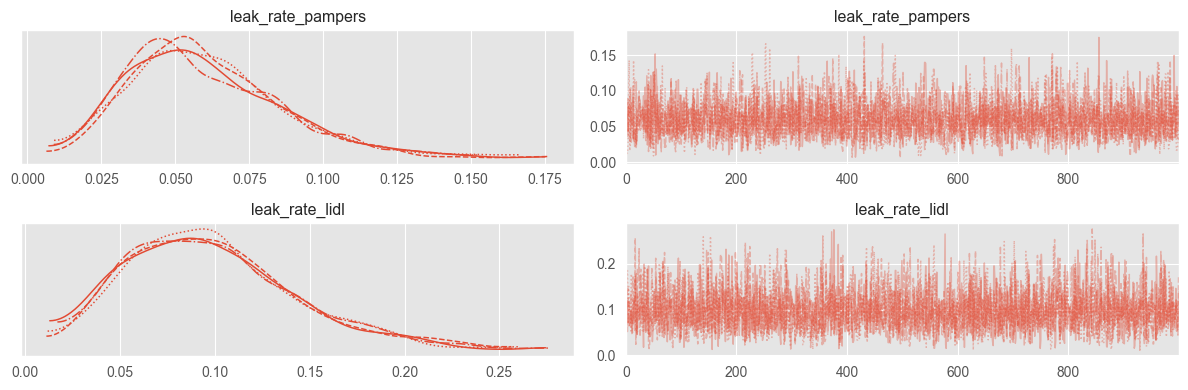

In [51]:
pm.plot_trace( trace )
plt.tight_layout()

In [52]:
pm.summary( trace )

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
leak_rate_pampers,0.060,0.026,0.016,0.107,0.000,0.000,3470.0,2086.0,1.0
leak_rate_lidl,0.098,0.045,0.023,0.184,0.001,0.001,3692.0,2319.0,1.0


Obviously we estimate the "mean leak rate" higher for the Lidl brand. But can we really say that they are worse?

<Axes: title={'center': 'x'}>

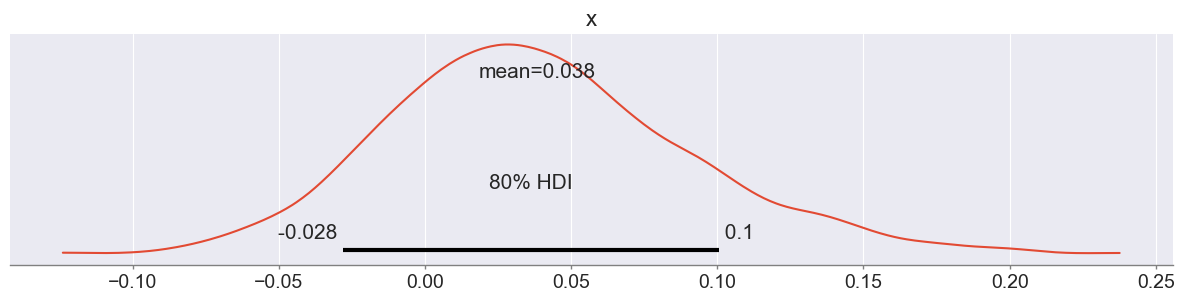

In [53]:
diff = trace.posterior.leak_rate_lidl - trace.posterior.leak_rate_pampers
pm.plot_posterior( diff, hdi_prob=0.8 )

The resulting HDI of the difference includes 0 at the 80% level and consequently is **not significant** at the 80% level. It will definitely not be significant at the 90% or 95% level. The data does not indicate that we should already stop our experiment, rather we should collect more "data" 💩